In [2]:
## This is a RandomForest model trained by cardio_train data by Me.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow import keras
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn.linear_model as lm
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from keras.models import Sequential, load_model
from keras.layers import Dense
from tensorflow import keras
import numpy as np


2024-04-04 15:17:19.399609: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-04 15:17:19.399959: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-04 15:17:19.402284: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-04 15:17:19.431796: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-04 15:17:20.073796: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [3]:
data = pd.read_csv("cardio_train.csv",sep=";")


print(data.head())


data = data.drop(0)
    
data = data.drop(columns=['id'])


nan_values = data.isna().sum()
print(nan_values)

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [4]:

X = data.drop('cardio', axis=1)  
y = data['cardio']  

scaler = StandardScaler()

X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [67]:

def Machine_Learning(X_train, X_test, y_train, y_test):
    print("Machine Learning")
    print("=====================================")

    log_reg = lm.LogisticRegression()
    log_reg.fit(X_train, y_train)
    log_reg_score = log_reg.score(X_test, y_test)
    print("Logistic Regression Testing Accuracy: ", log_reg_score)
    print("Logistic Regression Classification Report: ")
    print(classification_report(y_test, log_reg.predict(X_test)))
    print("=====================================")

    # Decision Tree
    Decision_tree = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=None, min_samples_leaf=5)
    Decision_tree.fit(X_train, y_train)
    Decision_tree_score = Decision_tree.score(X_test, y_test)
    print("Decision Tree Testing Accuracy: ", Decision_tree_score)
    print("Decision Tree Classification Report: ")
    print(classification_report(y_test, Decision_tree.predict(X_test)))
    print("=====================================")

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    knn_score = knn.score(X_test, y_test)
    print("KNN Testing Accuracy: ", knn_score)
    print("=====================================")

    lin_reg = lm.LinearRegression()
    lin_reg.fit(X_train, y_train)
    lin_reg_score = lin_reg.score(X_test, y_test)
    print("Linear Regression Testing Accuracy: ", lin_reg_score)
    print("=====================================")

    Sgd_reg = lm.SGDRegressor()
    Sgd_reg.fit(X_train, y_train)
    Sgd_reg_score = Sgd_reg.score(X_test, y_test)
    print("SGD Testing Accuracy: ", Sgd_reg_score)
    print("=====================================")

    Ridge_reg = lm.Ridge()
    Ridge_reg.fit(X_train, y_train)
    Ridge_reg_score = Ridge_reg.score(X_test, y_test)
    print("Ridge Testing Accuracy: ", Ridge_reg_score)
    print("=====================================")

    Lasso_reg = lm.Lasso()
    Lasso_reg.fit(X_train, y_train)
    Lasso_reg_score = Lasso_reg.score(X_test, y_test)
    print("Lasso Testing Accuracy: ", Lasso_reg_score)
    print("=====================================")

    Elastic_reg = lm.ElasticNet()
    Elastic_reg.fit(X_train, y_train)
    Elastic_reg_score = Elastic_reg.score(X_test, y_test)
    print("Elastic Testing Accuracy: ", Elastic_reg_score)
    print("=====================================")

    Huber_reg = lm.HuberRegressor()
    Huber_reg.fit(X_train, y_train)
    Huber_reg_score = Huber_reg.score(X_test, y_test)
    print("Huber Testing Accuracy: ", Huber_reg_score)
    print("=====================================")

    Ransac_reg = lm.RANSACRegressor()
    Ransac_reg.fit(X_train, y_train)
    Ransac_reg_score = Ransac_reg.score(X_test, y_test)
    print("Ransac Testing Accuracy: ", Ransac_reg_score)
    print("=====================================")

    # Theil regression is not working (Low memory)
    # Theil_reg = lm.TheilSenRegressor()
    # Theil_reg.fit(X_train, y_train)
    # Theil_reg_score = Theil_reg.score(X_test, y_test)
    # print("Theil Testing Accuracy: ", Theil_reg_score)

    models = [log_reg, Decision_tree, knn, lin_reg, Sgd_reg, Ridge_reg, Lasso_reg, Elastic_reg, Huber_reg, Ransac_reg]
    scores = [log_reg_score,
              Decision_tree_score,
              knn_score,
              lin_reg_score,
              Sgd_reg_score,
              Ridge_reg_score,
              Lasso_reg_score,
              Elastic_reg_score,
              Huber_reg_score,
              Ransac_reg_score]

    print("---------------------------------------------------------------------------------")

    return models, scores


In [68]:
Machine_Learning(X_train,X_test,y_train,y_test)

Machine Learning
Logistic Regression Testing Accuracy:  0.7205714285714285
Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      7004
           1       0.74      0.67      0.71      6996

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000

Decision Tree Testing Accuracy:  0.6587857142857143
Decision Tree Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.68      0.67      7004
           1       0.67      0.64      0.65      6996

    accuracy                           0.66     14000
   macro avg       0.66      0.66      0.66     14000
weighted avg       0.66      0.66      0.66     14000

KNN Testing Accuracy:  0.6519285714285714
Linear Regression Testing Accuracy:  0.1175876457723436
SGD Testing Accuracy:  -1.2427193254538

/home/davutcan/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/davutcan/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/davutcan/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


([LogisticRegression(),
  DecisionTreeClassifier(min_samples_leaf=5, random_state=42),
  KNeighborsClassifier(),
  LinearRegression(),
  SGDRegressor(),
  Ridge(),
  Lasso(),
  ElasticNet(),
  HuberRegressor(),
  RANSACRegressor()],
 [0.7205714285714285,
  0.6587857142857143,
  0.6519285714285714,
  0.1175876457723436,
  -1.2427193254538712e+21,
  0.11758769716446094,
  -3.192537345597657e-10,
  -3.192537345597657e-10,
  -3.3699636078677084,
  -1.0005720818194654])

In [69]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier() 
# Random Forest selected
model.fit(X_train, y_train)

# Test the accuracy and find best parameters 
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Doğruluğu:", accuracy)

param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 20]}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print('Best Parameters: ', best_params)

best_rand_forest = RandomForestClassifier(**best_params)
best_rand_forest.fit(X_train, y_train)
print('Train Accuracy: ', best_rand_forest.score(X_train,y_train))
print('Test Accuracy: ', best_rand_forest.score(X_test,y_test))

Model Doğruluğu: 0.7158571428571429
Best Parameters:  {'max_depth': 10, 'n_estimators': 300}
Train Accuracy:  0.7549599099983928
Test Accuracy:  0.7337142857142858


[0 0 0 ... 1 0 1]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      7004
           1       0.76      0.68      0.72      6996

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000



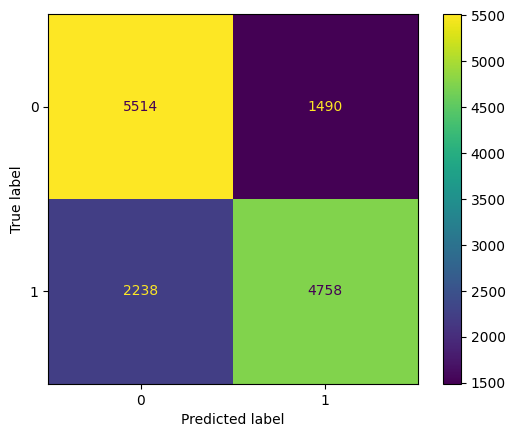

In [70]:
## Find the best result for random forest

import matplotlib.pyplot as plt
y_predictions = best_rand_forest.predict(X_test)


print(y_predictions)
print(classification_report(y_test, y_predictions))

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions)
plt.show()


In [1]:
## saving and loading model 

from joblib import dump
dump(best_rand_forest, 'random_forest_model.joblib')


NameError: name 'best_rand_forest' is not defined

In [72]:
from joblib import load

# Load the model from the file
rf_model = load('random_forest_model.joblib')


In [77]:
## Input test functions  (You can just enter the string as in the dataset or add dimension to data array and predict )
def predictor(rf_model,user):
     rate = rf_model.predict([[
        user['age'], user['gender'], user['height'], user['weight'],
        user['ap_hi'], user['ap_lo'], user['cholesterol'], user['gluc'],
        user['smoke'], user['alco'], user['active']
    ]])
     
     print("Your cardiovascular desease rate "+ str(rate))
     
def find_rate(input_string):
    # Split the input string by semicolons
    input_values = input_string.split(';')

    # Map values to respective keys and convert them to appropriate data types
    user_data = {
        'age': int(input_values[0]),
        'gender': int(input_values[1]),
        'height': int(input_values[2]),
        'weight': float(input_values[3]),
        'ap_hi': int(input_values[4]),
        'ap_lo': int(input_values[5]),
        'cholesterol': int(input_values[6]),
        'gluc': int(input_values[7]),
        'smoke': int(input_values[8]),
        'alco': int(input_values[9]),
        'active': int(input_values[10])
    }

    return predictor(rf_model,user_data)

# Example usage:
input_string = "17668;1;158;71.0;110;70;1;1;0;0;1"
find_rate(input_string)


Your cardiovascular desease rate [1]


# This is my artificial neural network model trained by cardio_train.csv data


In [5]:
model2 = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2.summary()

/home/davutcan/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-04 15:17:36.299270: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-04 15:17:36.299587: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,641 (525.94 KB)

 Trainable params: 134,641 (525.94 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
optimizer1= keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)

model2.compile(optimizer=optimizer1, loss='binary_crossentropy', metrics=['accuracy'])


In [7]:

history = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
model2.save("./YetmisDogruluk.keras")

Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6729 - loss: 0.6107 - val_accuracy: 0.7229 - val_loss: 0.5609
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7315 - loss: 0.5487 - val_accuracy: 0.7295 - val_loss: 0.5477
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7284 - loss: 0.5500 - val_accuracy: 0.7333 - val_loss: 0.5467
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7315 - loss: 0.5463 - val_accuracy: 0.7298 - val_loss: 0.5485
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7312 - loss: 0.5479 - val_accuracy: 0.7361 - val_loss: 0.5460
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7333 - loss: 0.5434 - val_accuracy: 0.7357 - val_loss: 0.5453
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7368 - loss: 0.5384 - val_accuracy: 0.7315 - val_loss: 0.5432
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7346 - loss: 0.5418 - 

In [8]:

loss , mae = model2.evaluate(X_train,y_train)

print(f"Test Loss: {loss:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

y_pred = model2.predict(X_test)

# Convert probabilities to class labels
y_pred = np.where(y_pred > 0.5, 1, 0)

acc = accuracy_score(y_test, y_pred)
print("Model Doğruluğu:", acc)

print(classification_report(y_test, y_pred))

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - accuracy: 0.7363 - loss: 0.5410
Test Loss: 0.5409
Mean Absolute Error (MAE): 0.7361
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step
Model Doğruluğu: 0.7348571428571429
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      7004
           1       0.75      0.71      0.73      6996

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000



In [9]:
yenimodel=load_model("YetmisDogruluk.keras")
testdata = [19834,1,164,68.0,110,60,1,1,0,0,0]

testdata1 = [ 22584, 2, 178, 95.0, 130, 90, 3, 3, 0, 0, 1]
# Scale the test data using the fitted scaler
testdata_scaled = scaler.transform([testdata])
testdata1_scaled= scaler.transform([testdata1])

# Predict the class label using the loaded model
prediction = yenimodel.predict(testdata_scaled)
print(prediction)

prediction1 = yenimodel.predict(testdata1_scaled)
print(prediction1)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[0.30579263]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[0.7836093]]


/home/davutcan/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/davutcan/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
